![Los Angeles skyline](la_skyline.jpg)

Los Angeles, California 😎. The City of Angels. Tinseltown. The Entertainment Capital of the World! 

Known for its warm weather, palm trees, sprawling coastline, and Hollywood, along with producing some of the most iconic films and songs. However, as with any highly populated city, it isn't always glamorous and there can be a large volume of crime. That's where you can help!

You have been asked to support the Los Angeles Police Department (LAPD) by analyzing crime data to identify patterns in criminal behavior. They plan to use your insights to allocate resources effectively to tackle various crimes in different areas.

Started from the Datacamp project but have done further analysis

## The Data

The dataset I’m using for this analysis has been obtained from data.lacity.org. 
https://data.lacity.org/Public-Safety/Crime-Data-from-2020-to-Present/2nrs-mtv8/about_data

# crimes.csv

| Column     | Description              |
|------------|--------------------------|
| `'DR_NO'` | Division of Records Number: Official file number made up of a 2-digit year, area ID, and 5 digits. |
| `'Date Rptd'` | Date reported - MM/DD/YYYY. |
| `'DATE OCC'` | Date of occurrence - MM/DD/YYYY. |
| `'TIME OCC'` | In 24-hour military time. |
| `'AREA NAME'` | The 21 Geographic Areas or Patrol Divisions are also given a name designation that references a landmark or the surrounding community that it is responsible for. For example, the 77th Street Division is located at the intersection of South Broadway and 77th Street, serving neighborhoods in South Los Angeles. |
| `'Crm Cd Desc'` | Indicates the crime committed. |
| `'Vict Age'` | Victim's age in years. |
| `'Vict Sex'` | Victim's sex: `F`: Female, `M`: Male, `X`: Unknown. |
| `'Vict Descent'` | Victim's descent:<ul><li>`A` - Other Asian</li><li>`B` - Black</li><li>`C` - Chinese</li><li>`D` - Cambodian</li><li>`F` - Filipino</li><li>`G` - Guamanian</li><li>`H` - Hispanic/Latin/Mexican</li><li>`I` - American Indian/Alaskan Native</li><li>`J` - Japanese</li><li>`K` - Korean</li><li>`L` - Laotian</li><li>`O` - Other</li><li>`P` - Pacific Islander</li><li>`S` - Samoan</li><li>`U` - Hawaiian</li><li>`V` - Vietnamese</li><li>`W` - White</li><li>`X` - Unknown</li><li>`Z` - Asian Indian</li> |
| `'Weapon Desc'` | Description of the weapon used (if applicable). |
| `'Status Desc'` | Crime status. |
| `'LOCATION'` | Street address of the crime. |

In [115]:
# Re-run this cell
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
crimes = pd.read_csv("Crime_Data_from_2020_to_Present_20240112.csv", parse_dates=["Date Rptd", "DATE OCC"], dtype={"TIME OCC": str})
crimes.head()

,DR_NO,Date Rptd,DATE OCC,TIME OCC,AREA,AREA NAME,Rpt Dist No,Part 1-2,Crm Cd,Crm Cd Desc,...,Status,Status Desc,Crm Cd 1,Crm Cd 2,Crm Cd 3,Crm Cd 4,LOCATION,Cross Street,LAT,LON
0,10304468,2020-01-08,2020-01-08,2230,3,Southwest,377,2,624,BATTERY - SIMPLE ASSAULT,...,AO,Adult Other,624.0,NaN,NaN,NaN,1100 W 39TH PL,NaN,34.0141,-118.2978
1,190101086,2020-01-02,2020-01-01,0330,1,Central,163,2,624,BATTERY - SIMPLE ASSAULT,...,IC,Invest Cont,624.0,NaN,NaN,NaN,700 S HILL ST,NaN,34.0459,-118.2545
2,200110444,2020-04-14,2020-02-13,1200,1,Central,155,2,845,SEX OFFENDER REGISTRANT OUT OF COMPLIANCE,...,AA,Adult Arrest,845.0,NaN,NaN,NaN,200 E 6TH ST,NaN,34.0448,-118.2474
3,191501505,2020-01-01,2020-01-01,1730,15,N Hollywood,1543,2,745,VANDALISM - MISDEAMEANOR ($399 OR UNDER),...,IC,Invest Cont,745.0,998.0,NaN,NaN,5400 CORTEEN PL,NaN,34.1685,-118.4019
4,191921269,2020-01-01,2020-01-01,0415,19,Mission,1998,2,740,"VANDALISM - FELONY ($400 & OVER, ALL CHURCH VA...",...,IC,Invest Cont,740.0,NaN,NaN,NaN,14400 TITUS ST,NaN,34.2198,-118.4468


## Preprocessing of the data

In [116]:
crimes.info()
crimes.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 764061 entries, 0 to 764060
Data columns (total 28 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   DR_NO           764061 non-null  int64         
 1   Date Rptd       764061 non-null  datetime64[ns]
 2   DATE OCC        764061 non-null  datetime64[ns]
 3   TIME OCC        764061 non-null  object        
 4   AREA            764061 non-null  int64         
 5   AREA NAME       764061 non-null  object        
 6   Rpt Dist No     764061 non-null  int64         
 7   Part 1-2        764061 non-null  int64         
 8   Crm Cd          764061 non-null  int64         
 9   Crm Cd Desc     764061 non-null  object        
 10  Mocodes         662300 non-null  object        
 11  Vict Age        764061 non-null  int64         
 12  Vict Sex        669514 non-null  object        
 13  Vict Descent    669503 non-null  object        
 14  Premis Cd       764041 non-null  flo

DR_NO                  0
Date Rptd              0
DATE OCC               0
TIME OCC               0
AREA                   0
AREA NAME              0
Rpt Dist No            0
Part 1-2               0
Crm Cd                 0
Crm Cd Desc            0
Mocodes           101761
Vict Age               0
Vict Sex           94547
Vict Descent       94558
Premis Cd             20
Premis Desc          482
Weapon Used Cd    500592
Weapon Desc       500592
Status                 1
Status Desc            0
Crm Cd 1              10
Crm Cd 2          712085
Crm Cd 3          762559
Crm Cd 4          764015
LOCATION               0
Cross Street      646069
LAT                    0
LON                    0
dtype: int64

## Crime over time taken from date of occurence

In [117]:
#crimes.head()

#sns.lineplot(data=crimes,x='DATE OCC')

# Group the crimes by DATE OCC and count the number of incidents
crime_counts = crimes.groupby('DATE OCC').size().reset_index(name='numIncidents')

# Convert 'year_month_OCC' into timestamp 
crime_counts['year_month_OCC'] = crimes['yyyy-mm']
crime_counts['year_month_OCC'] = pd.to_datetime(crimes['DATE OCC']).dt.strftime('%Y-%m')
crime_counts.head()


plt.figure()
sns.lineplot(data=crime_counts,x='year_month_OCC',y='numIncidents')
plt.title('Number of incidents of crime over time in LA. 2020 - 2023')
plt.xlabel('Date')
plt.ylabel('Number of Incidents')
plt.xticks(rotation=45)
plt.show()


KeyError: 'yyyy-mm'

In [127]:
# convert date to year
crimes['Year'] = pd.to_datetime(crimes['DATE OCC']).dt.strftime('%Y')
crimes['Year'].value_counts()

# hmmm dont know where these 2011 and 2010 years are coming from

#plt.figure()
#ax = sns.countplot(data=crimes,x='Year')
#for i in ax.containers:
 #  ax.bar_label(i)
#plt.title('Number of incidents of crime per year in LA. 2020 - 2023')
#plt.xlabel('Year')
#plt.ylabel('Number of Incidents')
#plt.show()

2023    399962
2021    106521
2011     98252
2010     58825
2022     56133
2020     44368
Name: Year, dtype: int64

## What hour has the highest frequency of crimes?

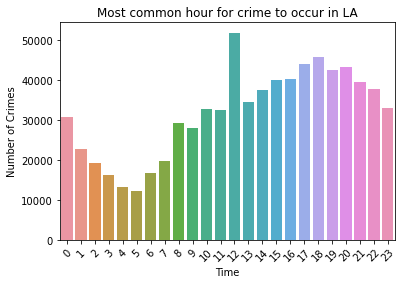

Peak crime hour is:  12


In [119]:
crimes['TIME OCC'] = pd.to_numeric(crimes['TIME OCC']) # convert TIME OCC from object to int

crimes['hour'] = (np.floor(crimes['TIME OCC'] / 100)).astype(int) # convert time to whole hour
#crimes.head()

# seaborn countplot 
plt.figure()
ax = sns.countplot(data=crimes,x='hour')
plt.xticks(rotation=45)
plt.title('Most common hour for crime to occur in LA')
plt.xlabel('Time')
plt.ylabel('Number of Crimes')
plt.show()


peak_crime_hour = crimes['hour'].value_counts().index[0].astype(int) # get peak crime hour
print(f'Peak crime hour is: ',peak_crime_hour) #print

## Area with highest amount of crime

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20]),
 [Text(0, 0, 'Central'),
  Text(1, 0, 'Southwest'),
  Text(2, 0, 'Hollywood'),
  Text(3, 0, '77th Street'),
  Text(4, 0, 'Rampart'),
  Text(5, 0, 'Wilshire'),
  Text(6, 0, 'Northeast'),
  Text(7, 0, 'West LA'),
  Text(8, 0, 'Van Nuys'),
  Text(9, 0, 'Pacific'),
  Text(10, 0, 'West Valley'),
  Text(11, 0, 'Southeast'),
  Text(12, 0, 'N Hollywood'),
  Text(13, 0, 'Newton'),
  Text(14, 0, 'Harbor'),
  Text(15, 0, 'Hollenbeck'),
  Text(16, 0, 'Olympic'),
  Text(17, 0, 'Devonshire'),
  Text(18, 0, 'Mission'),
  Text(19, 0, 'Topanga'),
  Text(20, 0, 'Foothill')])

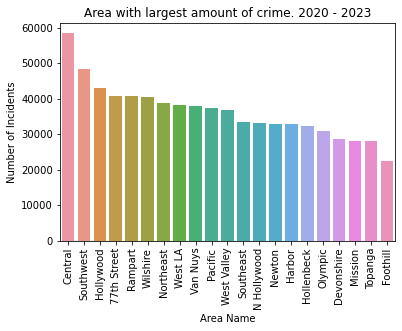

In [120]:
plt.figure()
ax = sns.countplot(data=crimes,x='AREA NAME', order = crimes['AREA NAME'].value_counts().index)
plt.title('Area with largest amount of crime. 2020 - 2023')
plt.xlabel('Area Name')
plt.ylabel('Number of Incidents')
plt.xticks(rotation=90)

## Which area has the largest frequency of night crimes
(crimes committed between 10pm and 3:59am)?

The area with the highest amount of night crime:  Central


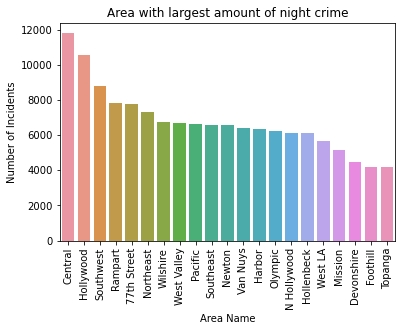

In [121]:
nightCrimes = crimes[(crimes['TIME OCC']> 2200) | (crimes['TIME OCC'] < 359)] # find crimes occuring greater than 10pm or less than 3.59am

peak_night_crime_location = nightCrimes['AREA NAME'].value_counts().index[0] # count the area name and take the first value
print(f'The area with the highest amount of night crime: ',peak_night_crime_location)

plt.figure()
ax = sns.countplot(data=nightCrimes,x='AREA NAME', order = nightCrimes['AREA NAME'].value_counts().index)
plt.title('Area with largest amount of night crime')
plt.xlabel('Area Name')
plt.ylabel('Number of Incidents')
plt.xticks(rotation=90)
plt.show()

## Crimes commited against victims by age group
(0-17, 18-25, 26-34, 35-44, 45-54, 55-64, 65+)

26-34    142920
35-44    124258
18-25     95421
45-54     88935
55-64     59796
65+       43070
0-17      25139
Name: age_bracket, dtype: int64


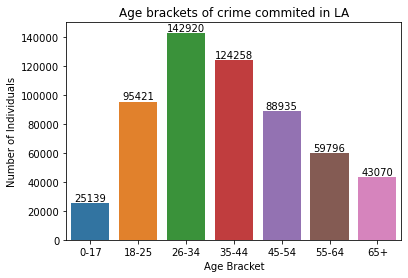

In [122]:
# cut the victim age into age groups
crimes['age_bracket'] = pd.cut(crimes['Vict Age'], [0, 17, 25, 34, 44, 54, 64, 100], labels=['0-17', '18-25', '26-34', '35-44','45-54','55-64','65+']) 

victim_ages = crimes['age_bracket'].value_counts() # count by age groups
print(victim_ages)

# sns countplot
plt.figure()
ax = sns.countplot(data=crimes,x='age_bracket')
for i in ax.containers:
    ax.bar_label(i)
plt.title('Age brackets of crime commited in LA')
plt.xlabel('Age Bracket')
plt.ylabel('Number of Individuals')
plt.show()

## Top 10 most common types of crime

number of unique crimes:  138


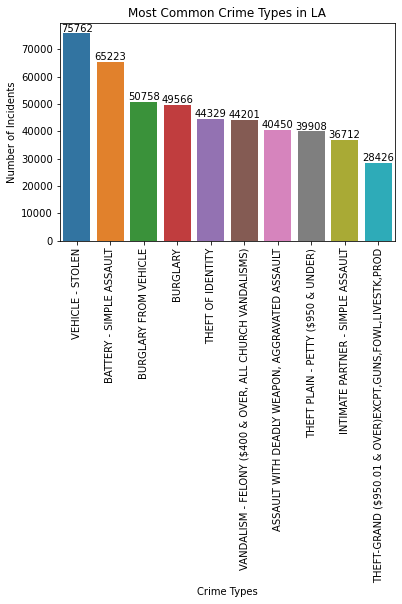

In [123]:
# preprocess and clean data
print(f'number of unique crimes: ',crimes['Crm Cd Desc'].nunique())

# Group the crime code desc
crime_types = crimes.groupby('Crm Cd Desc').size().reset_index(name='counts').sort_values(by='counts', ascending=False)

# Plot the top 10 commited crime
plt.figure()
ax = sns.barplot(data=crime_types[:10], x='Crm Cd Desc', y='counts')
for i in ax.containers:
    ax.bar_label(i)
plt.title('Most Common Crime Types in LA')
plt.xlabel('Crime Types')
plt.ylabel('Number of Incidents')
plt.xticks(rotation=90)
plt.show()

#sns.countplot(data=crimes, x='Crm Cd Desc', hue='Vict Sex')

## What sex is most likely to be a victim

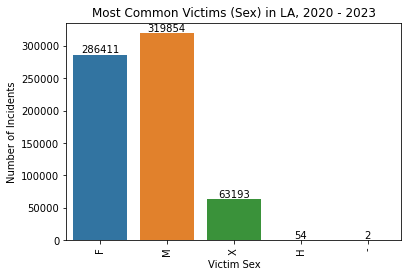

<function matplotlib.pyplot.figure(num=None, figsize=None, dpi=None, facecolor=None, edgecolor=None, frameon=True, FigureClass=<class 'matplotlib.figure.Figure'>, clear=False, **kwargs)>

In [124]:
# Plot the most common type of victim as per their sex
plt.figure()
ax = sns.countplot(data=crimes, x='Vict Sex')
for i in ax.containers:
    ax.bar_label(i)
plt.title('Most Common Victims (Sex) in LA, 2020 - 2023')
plt.xlabel('Victim Sex')
plt.ylabel('Number of Incidents')
plt.xticks(rotation=90)
plt.show()
plt.figure

Crm Cd Desc                                     Vict Sex
THEFT OF IDENTITY                               F           14455
BATTERY - SIMPLE ASSAULT                        M           10530
ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT  M            9721
dtype: int64


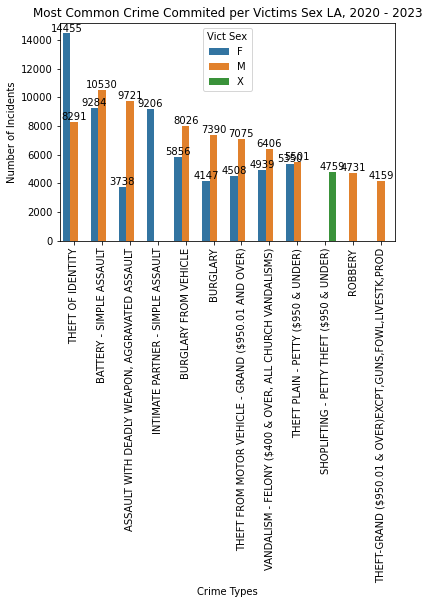

In [87]:
crime_sex = crimes.groupby(['Crm Cd Desc','Vict Sex']).size().reset_index(name='counts').sort_values(by = 'counts', ascending=False)

test = crimes.groupby(['Crm Cd Desc','Vict Sex']).size().nlargest(3)
print(test)
#crimes.groupby(['Crm Cd Desc','Vict Sex']).size()

# Plot the top 10 commited crime
plt.figure()
ax = sns.barplot(data=crime_sex[:20], x='Crm Cd Desc', y='counts', hue='Vict Sex')
for i in ax.containers:
    ax.bar_label(i)
plt.title('Most Common Crime Commited per Victims Sex LA, 2020 - 2023')
plt.xlabel('Crime Types')
plt.ylabel('Number of Incidents')
plt.xticks(rotation=90)
plt.show()



In [13]:
#sns.countplot(data=crimes,x='Vict Sex')

crimes['Vict Descent'].value_counts()
#sns.countplot(data=crimes,x='Vict Descent')

crimes.groupby('Crm Cd Desc')['Vict Age'].agg(['count','mean','median'])




H    75350
W    48593
B    35307
X    26059
O    19516
A     5610
K     1398
F     1232
C     1210
J      434
V      329
I      322
Z      145
P       83
U       77
D       21
L       20
S       17
G       14
-        2
Name: Vict Descent, dtype: int64

In [ ]:
# remove null values from age?
# are the missing values less than 5%
threshold = len(crimes) * 0.05
print(threshold)
